In [ ]:
! wget https://raw.githubusercontent.com/Russkova/diplom/main/data_preprocessing.py -O data_preprocessing.py
! wget https://raw.githubusercontent.com/evfro/recsys19_hybridsvd/master/scaledsvd.py -O scaledsvd.py

! pip install lightfm
!apt-get install libsuitesparse-dev
!pip install scikit-sparse
! wget https://raw.githubusercontent.com/Russkova/diplom/main/hybrids.py -O hybrids.py

--2024-05-23 02:41:15--  https://raw.githubusercontent.com/Russkova/diplom/main/data_preprocessing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11288 (11K) [text/plain]
Saving to: ‘data_preprocessing.py’

data_preprocessing. 100%[===================>]  11.02K  --.-KB/s    in 0s      

2024-05-23 02:41:15 (91.3 MB/s) - ‘data_preprocessing.py’ saved [11288/11288]

--2024-05-23 02:41:15--  https://raw.githubusercontent.com/evfro/recsys19_hybridsvd/master/scaledsvd.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1507 (1.5K) [

In [ ]:
! pip install --upgrade git+https://github.com/Russkova/polara@main#egg=polara

  Cloning https://github.com/Russkova/polara (to revision main) to /tmp/pip-install-6st4p4rb/polara_490beaaaec644d429f9b49d9e9339be0
  Running command git clone --filter=blob:none --quiet https://github.com/Russkova/polara /tmp/pip-install-6st4p4rb/polara_490beaaaec644d429f9b49d9e9339be0
  Resolved https://github.com/Russkova/polara to commit f42942bef0c2c2c0b344c9e93164e2e799e7176c
  Preparing metadata (setup.py) ... done
  Created wheel for polara: filename=polara-0.7.2-py3-none-any.whl size=86271 sha256=b0e93b994aa4fde8700cd2d2a20707362bbb4a286e9e9f895bcb35d92fb86bb8
  Stored in directory: /tmp/pip-ephem-wheel-cache-te59yu6w/wheels/ce/05/37/5a9c8c1d28b55ab27441755eac459c8dae32bcf6592950c761
Successfully built polara


In [ ]:
! pip install ipypb

In [ ]:
! wget https://raw.githubusercontent.com/evfro/recsys19_hybridsvd/master/data/meta_info_ml1m.csv -O meta_info_ml1m.csv
! wget https://raw.githubusercontent.com/evfro/recsys19_hybridsvd/master/utils.py -O utils.py
!apt-get install libsuitesparse-dev
!pip install scikit-sparse
! wget https://github.com/Russkova/diplom/raw/main/ml-1m.zip -O ml-1m.zip

--2024-05-23 02:42:57--  https://raw.githubusercontent.com/evfro/recsys19_hybridsvd/master/data/meta_info_ml1m.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 432261 (422K) [text/plain]
Saving to: ‘meta_info_ml1m.csv’

meta_info_ml1m.csv  100%[===================>] 422.13K  --.-KB/s    in 0.05s   

2024-05-23 02:42:57 (8.74 MB/s) - ‘meta_info_ml1m.csv’ saved [432261/432261]

--2024-05-23 02:42:57--  https://raw.githubusercontent.com/evfro/recsys19_hybridsvd/master/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3773 (

In [ ]:
%env MKL_NUM_THREADS=16
%env OMP_NUM_THREADS=16

env: MKL_NUM_THREADS=16
env: OMP_NUM_THREADS=16


In [ ]:
import numpy as np
import pandas as pd
from ipypb import track

from polara.evaluation import evaluation_engine as ee
from polara.evaluation.pipelines import (find_optimal_config,
                                         set_config)

from hybrids import HybridSVD, HybridSVDColdStart
from data_preprocessing import (get_movielens_data,
                                get_bookcrossing_data,
                                get_similarity_data,
                                prepare_data_model,
                                prepare_cold_start_data_model,
                                SimilarityDataModel)
from utils import (report_results, save_results,
                   apply_config, print_data_stats,
                   save_training_time, save_cv_training_time)
%matplotlib inline

In [ ]:
from polara.recommender import defaults
defaults.memory_hard_limit = 10

In [ ]:
seed = 42

In [ ]:
data_labels = ['Amzb']
svd_ranks = {'Amzb': [1, 5, 10, 15, 20, 30, 50, 60, 75, 100, 125, 150, 200, 250, 300,
              350, 400, 500, 750, 1000]}
hybridsvd_weights = [0.1, 0.3, 0.5, 0.7, 0.9]
topk_values = [1, 3, 10, 20, 30]
target_metric = 'mrr'
data_dict = dict.fromkeys(data_labels)
meta_dict = dict.fromkeys(data_labels)
similarities = dict.fromkeys(data_labels)
sim_indices = dict.fromkeys(data_labels)
feature_idx = dict.fromkeys(data_labels)
all_data = [data_dict, similarities, sim_indices, meta_dict]
lbl = 'Amzb'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train =  pd.read_csv('/content/drive/MyDrive/AMZbtrain.csv')
test =  pd.read_csv('/content/drive/MyDrive/AMZbtest.csv')
data =  pd.read_csv('/content/drive/MyDrive/AMZbdata.csv')
data = data.rename(columns={'ProductId': 'itemid', 'UserNum': 'userid', 'Rating': 'rating'})
train = train.rename(columns={'ProductId': 'itemid', 'UserNum': 'userid', 'Rating': 'rating'})
train = train.rename(columns={'ProductId': 'itemid', 'UserNum': 'userid', 'Rating': 'rating'})

In [ ]:
data_dict['Amzb'] = data

In [ ]:
data_dict[lbl] = data_dict[lbl].sort_values(['userid', 'Timestamp'], ascending=[True, True]).reset_index(drop=True)
train = train.sort_values(['userid', 'Timestamp'], ascending=[True, True])



In [ ]:
meta_dict['Amzb'] =  pd.DataFrame()

meta_dict['Amzb'].index.name = 'itemid'

In [ ]:
data_dict[lbl]


In [ ]:
train

,itemid,rating,Timestamp,userid
0,15786,0,1272844800,0
1,7841,0,1288569600,0
2,16097,0,1297900800,0
3,13818,1,1299974400,0
4,7187,1,1300233600,0
...,...,...,...,...
102868,16611,0,1351382400,6259
102869,16688,1,1351382400,6259
102870,17063,1,1351382400,6259
102871,17333,0,1351382400,6259


In [ ]:
similarities['Amzb'] = {'userid': None, 'itemid': None}
sim_indices['Amzb'] = {'userid': data_dict['Amzb']['userid'].unique(), 'itemid': data_dict['Amzb']['itemid'].unique()}

In [ ]:
from scipy.sparse import save_npz
from scipy.sparse import load_npz
file_name = '/content/drive/MyDrive/AMZbsimilarity_matrix.npz'

sim_user = load_npz(file_name)

In [ ]:
similarities['Amzb']['userid']=sim_user

Mounted at /content/drive


In [ ]:
import numpy as np
from scipy.sparse import eye, csr_matrix

rows = cols = len(data_dict['Amzb']['itemid'].unique())
matrix = eye(rows, cols, dtype=int, format='csr')

print(f"Размер матрицы: {matrix.shape}")
print(f"Количество ненулевых элементов: {matrix.nnz}")

Размер матрицы: (18352, 18352)
Количество ненулевых элементов: 18352


In [ ]:
similarities[lbl]['itemid'] = matrix



In [ ]:
all_data

[{'Amzb':         itemid  rating   Timestamp  userid
  0        15786       0  1272844800       0
  1         7841       0  1288569600       0
  2        16097       0  1297900800       0
  3        13818       1  1299974400       0
  4         7187       1  1300233600       0
  ...        ...     ...         ...     ...
  102868   16611       0  1351382400    6259
  102869   16688       1  1351382400    6259
  102870   17063       1  1351382400    6259
  102871   17333       0  1351382400    6259
  102872   17688       0  1351382400    6259
  
  [102873 rows x 4 columns]},
 {'Amzb': {'userid': <6260x6260 sparse matrix of type '<class 'numpy.float32'>'
   	with 1855426 stored elements in Compressed Sparse Column format>,
   'itemid': <17899x17899 sparse matrix of type '<class 'numpy.int64'>'
   	with 17899 stored elements in Compressed Sparse Row format>}},
 {'Amzb': {'userid': array([   0,    1,    2, ..., 6257, 6258, 6259]),
   'itemid': array([15786,  7841, 16097, ..., 15900, 16578,

In [ ]:
train = train.sort_values(['userid', 'Timestamp'], ascending=[True, True])


In [ ]:


def fine_tune_hybridsvd(model, ranks, weights, label, record_time=False):
    param_grid = [(w, r) for w in weights for r in reversed(list(sorted(ranks)))]
    param_names = ('features_weight', 'rank')
    best_svd_config, svd_scores = find_optimal_config(model, param_grid, param_names,
                                                      target_metric,
                                                      return_scores=True,
                                                      force_build=False,
                                                      iterator=lambda x: track(x, label=label))
    model_config = {model.method: dict(zip(param_names, best_svd_config))}
    model_scores = {model.method: svd_scores}
    try:
        if record_time:
            max_rank = max(ranks)
            save_training_time(f'{experiment_name}_rank_{max_rank}', model, svd_scores.xs(max_rank, level='rank').index, label)
    finally:
        return model_config, model_scores
    return model_config, model_scores
def prepare_data_model_last_rating_hold(data_label, raw_data, similarities, sim_indices, item_meta, seed=0, feedback=None, custom_order='timestamp'):
    userid = 'userid'
    itemid = item_meta[data_label].index.name
    data_model = SimilarityDataModel(similarities[data_label],
                                     sim_indices[data_label],
                                     raw_data[data_label],
                                     userid, itemid,
                                     feedback=feedback,
                                     seed=seed)
    data_model.test_fold = 0
    data_model.test_ratio = 0
    data_model.holdout_size = 1
    data_model._custom_order  = custom_order
    data_model.random_holdout = False
    data_model.warm_start = False
    data_model.verbose = False
    data_model.prepare()
    return data_model

In [ ]:
config = {}
scores = {}
data_models = {}

In [ ]:
similarities[lbl]

{'userid': <6260x6260 sparse matrix of type '<class 'numpy.float32'>'
 	with 1855426 stored elements in Compressed Sparse Column format>,
 'itemid': <3522x3522 sparse matrix of type '<class 'numpy.int64'>'
 	with 3522 stored elements in Compressed Sparse Row format>}

In [ ]:
meta_dict['Amzb'].index.name

'itemid'

In [ ]:
data_dict[lbl] = data_dict[lbl].sort_values(['userid', 'timestamp'], ascending=[True, False])
data = data_dict[lbl]

In [ ]:
for label in track(data_labels):
    data_models[label] = prepare_data_model_last_rating_hold(label, *all_data, seed, custom_order='Timestamp')
    config[label], scores[label] = fine_tune_hybridsvd(HybridSVD(data_models[label]),
                                                       svd_ranks[label],
                                                       hybridsvd_weights,
                                                       label, record_time=True)

 [████████████████████████████████████████████████████████████] 1/1 [38:27<38:27, 2306.80s/it]

           Amzb [█████████████████████████████████████████████] 100/100 [38:21<00:02, 23.01s/it]

/content/hybrids.py:121: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  self._cholesky[entity] = CholeskyFactor(cholesky_decomp(entity_similarity, beta=beta))
/content/hybrids.py:52: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  self._factor.cholesky_inplace(A, beta=beta)
/content/hybrids.py:52: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  self._factor.cholesky_inplace(A, beta=beta)
/content/hybrids.py:52: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  self._factor.cholesky_inplace(A, beta=beta)
/content/hybrids.py:52: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  self._factor.cholesky_inplace(A, beta=beta)


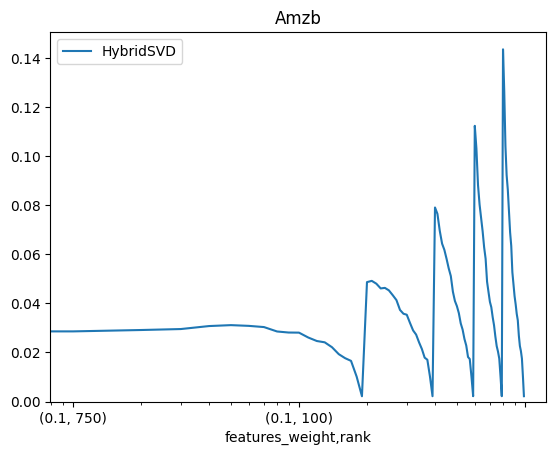

In [ ]:
report_results('rank', scores);

In [ ]:
config

{'Amzb': {'HybridSVD': {'features_weight': 0.9, 'rank': 1000}}}

### Проверка метрик

In [ ]:
data_dict['Amzb'] = data

In [ ]:
data

,itemid,rating,Timestamp,userid
0,15786,0,1272844800,0
1,7841,0,1288569600,0
2,16097,0,1297900800,0
3,13818,1,1299974400,0
4,7187,1,1300233600,0
...,...,...,...,...
109128,16611,0,1351382400,6259
109129,16688,1,1351382400,6259
109130,17063,1,1351382400,6259
109131,17333,0,1351382400,6259


In [ ]:
data_models = prepare_data_model_last_rating_hold(lbl, *all_data, seed,custom_order='Timestamp' ) #вставить мою функцию препаре и свою олл дату

model_last = HybridSVD(data_models)

model_last.rank = 1000
model_last.features_weight =0.9
model_last.evaluate()

HybridSVD model is not ready. Rebuilding.
Performing sparse Cholesky decomposition for itemid similarity
Cholesky decomposition computation time: 0.004s
Performing sparse Cholesky decomposition for userid similarity


/content/hybrids.py:121: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  self._cholesky[entity] = CholeskyFactor(cholesky_decomp(entity_similarity, beta=beta))


Cholesky decomposition computation time: 2.279s
HybridSVD training time: 04m:60s
Building itemid projector for HybridSVD
    Solving triangular system: 0.426s
    Applying Cholesky factor: 0.926s


[Relevance(hr=0.15423901940755874),
 Ranking(arhr=0.07953761802076409, mrr=0.07953761802076409),
 Experience(coverage=0.29416342412451363),
 Hits(true_positive=906, false_positive=57834, true_negative=None, false_negative=4968)]